In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('../../data/processed/Cleaned_AIS_data.csv')

In [5]:
X = df[['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselType', 
                              'Status', 'TransceiverClass']]

In [6]:
# scale the values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
# demension reduction with PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(scaled_X)

In [13]:
clf = IsolationForest(random_state=0)
pred = clf.fit_predict(pca_X)

In [14]:
pred

array([-1, -1,  1, ..., -1, -1, -1])

In [15]:
type(pred)

numpy.ndarray

In [16]:
# see the frequence of each predicted label
pd.Series(pred).value_counts()

 1    8282969
-1    3145389
dtype: int64

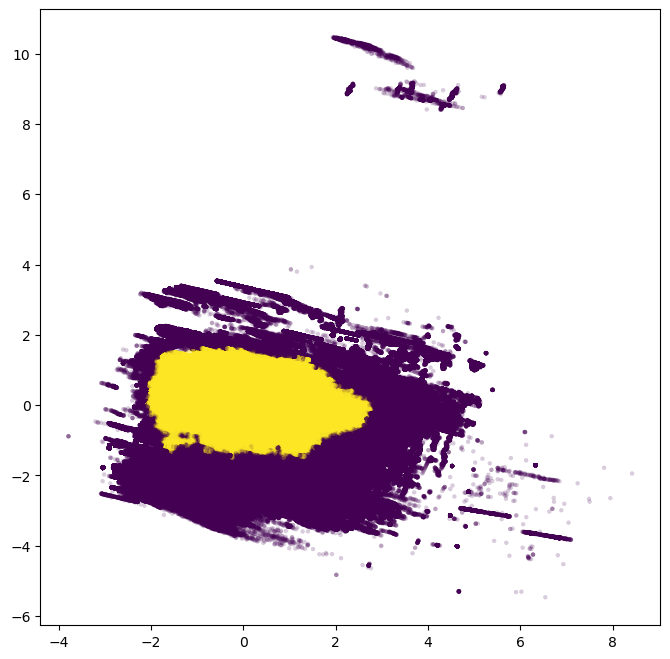

In [22]:
# plot the data
plt.figure(figsize=(8, 8))
plt.scatter(x=pca_X[:, 0], y=pca_X[:, 1], marker='.', linewidth=0.1, alpha=0.2, c=pred)